In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [3]:
df=pd.read_csv('Traffic_Violations.csv',low_memory=False)

In [4]:
df.columns

Index(['Date Of Stop', 'Time Of Stop', 'Agency', 'SubAgency', 'Description',
       'Location', 'Latitude', 'Longitude', 'Accident', 'Belts',
       'Personal Injury', 'Property Damage', 'Fatal', 'Commercial License',
       'HAZMAT', 'Commercial Vehicle', 'Alcohol', 'Work Zone', 'State',
       'VehicleType', 'Year', 'Make', 'Model', 'Color', 'Violation Type',
       'Charge', 'Article', 'Contributed To Accident', 'Race', 'Gender',
       'Driver City', 'Driver State', 'DL State', 'Arrest Type',
       'Geolocation'],
      dtype='object')

In [5]:
len(df['Agency'])

1292399

In [6]:
df['datetime']=df['Date Of Stop']+df['Time Of Stop']

In [7]:
df['datetime'].describe()

count                1292399
unique                626010
top       04/27/201714:36:00
freq                      59
Name: datetime, dtype: object

In [8]:
df[df['Alcohol']=='Yes']

,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,...,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation,datetime
1620,08/30/2017,19:55:00,MCP,"4th district, Wheaton",FAILURE OF INDIVIDUAL DRIVING ON HIGHWAY TO DI...,SB GEORGIA AVE @ HEWITT AVE,39.078595,-77.069165,No,No,...,Transportation Article,No,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.078595, -77.069165)",08/30/201719:55:00
1622,08/30/2017,19:55:00,MCP,"4th district, Wheaton",DRIVING MOTOR VEHICLE ON HIGHWAY WITHOUT REQUI...,SB GEORGIA AVE @ HEWITT AVE,39.078595,-77.069165,No,No,...,Transportation Article,No,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.078595, -77.069165)",08/30/201719:55:00
1623,08/30/2017,19:55:00,MCP,"4th district, Wheaton",PERSON DRIVING MOTOR VEHICLE ON HIGHWAY OR PUB...,SB GEORGIA AVE @ HEWITT AVE,39.078595,-77.069165,No,No,...,Transportation Article,No,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.078595, -77.069165)",08/30/201719:55:00
1624,08/30/2017,19:55:00,MCP,"4th district, Wheaton",PERSON DRIVING MOTOR VEHICLE WHILE LICENSE SUS...,SB GEORGIA AVE @ HEWITT AVE,39.078595,-77.069165,No,No,...,Transportation Article,No,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.078595, -77.069165)",08/30/201719:55:00
1634,08/30/2017,19:55:00,MCP,"4th district, Wheaton",PERSON DRIVING MOTOR VEHICLE ON HIGHWAY OR PUB...,SB GEORGIA AVE @ HEWITT AVE,39.078595,-77.069165,No,No,...,Transportation Article,No,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.078595, -77.069165)",08/30/201719:55:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1263877,10/16/2012,18:21:00,MCP,"5th district, Germantown",POSSESSING SUSPENDED LIC.,IS270 AT QUINCE ORCHARD BLVD,39.151613,-77.219203,No,No,...,Transportation Article,No,WHITE,M,GAITHERSBURG,MD,MD,A - Marked Patrol,"(39.1516132666667, -77.2192025666667)",10/16/201218:21:00
1263878,10/16/2012,18:21:00,MCP,"5th district, Germantown",DISPLAY SUSPENDED LIC.,IS270 AT QUINCE ORCHARD BLVD,39.151613,-77.219203,No,No,...,Transportation Article,No,WHITE,M,GAITHERSBURG,MD,MD,A - Marked Patrol,"(39.1516132666667, -77.2192025666667)",10/16/201218:21:00
1263918,11/07/2012,09:41:00,MCP,"5th district, Germantown",FAILURE OF INDIVIDUAL DRIVING ON HIGHWAY TO DI...,WOODFIELD ROAD AND FIELDCREST ROAD,39.248486,-77.192872,No,No,...,Transportation Article,No,BLACK,F,GAITHERSBURG,MD,MD,S - License Plate Recognition,"(39.24848565, -77.1928721833333)",11/07/201209:41:00
1263919,11/07/2012,09:41:00,MCP,"5th district, Germantown",FAILURE TO DISPLAY REGISTRATION CARD UPON DEMA...,WOODFIELD ROAD AND FIELDCREST ROAD,39.248486,-77.192872,No,No,...,Transportation Article,No,BLACK,F,GAITHERSBURG,MD,MD,S - License Plate Recognition,"(39.24848565, -77.1928721833333)",11/07/201209:41:00


In [9]:
df['Alcohol'].describe()

count     1292399
unique          2
top            No
freq      1290191
Name: Alcohol, dtype: object

In [10]:
type(df['Date Of Stop'][0])

str

In [11]:
df['Date Of Stop']=pd.to_datetime(df['Date Of Stop'])

In [12]:
type(df['Date Of Stop'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [13]:
df.head()

,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,...,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation,datetime
0,2013-09-24,17:11:00,MCP,"3rd district, Silver Spring",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,8804 FLOWER AVE,NaN,NaN,No,No,...,Transportation Article,No,BLACK,M,TAKOMA PARK,MD,MD,A - Marked Patrol,NaN,09/24/201317:11:00
1,2017-08-29,10:19:00,MCP,"2nd district, Bethesda",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,WISCONSIN AVE@ ELM ST,38.981725,-77.092757,No,No,...,Transportation Article,No,WHITE,F,FAIRFAX STATION,VA,VA,A - Marked Patrol,"(38.981725, -77.0927566666667)",08/29/201710:19:00
2,2014-12-01,12:52:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE STOP AND YIELD AT THRU HWY,CHRISTOPHER AVE/MONTGOMERY VILLAGE AVE,39.162888,-77.229088,No,No,...,Transportation Article,No,BLACK,F,UPPER MARLBORO,MD,MD,A - Marked Patrol,"(39.1628883333333, -77.2290883333333)",12/01/201412:52:00
3,2017-08-29,09:22:00,MCP,"3rd district, Silver Spring",FAILURE YIELD RIGHT OF WAY ON U TURN,CHERRY HILL RD./CALVERTON BLVD.,39.056975,-76.954633,No,No,...,Transportation Article,No,BLACK,M,FORT WASHINGTON,MD,MD,A - Marked Patrol,"(39.056975, -76.9546333333333)",08/29/201709:22:00
4,2017-08-28,23:41:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE OF DR. TO MAKE LANE CHANGE TO AVAIL. L...,355 @ SOUTH WESTLAND DRIVE,NaN,NaN,No,No,...,Transportation Article,No,WHITE,M,GAITHERSBURG,MD,MD,A - Marked Patrol,NaN,08/28/201723:41:00


/home/mitch/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


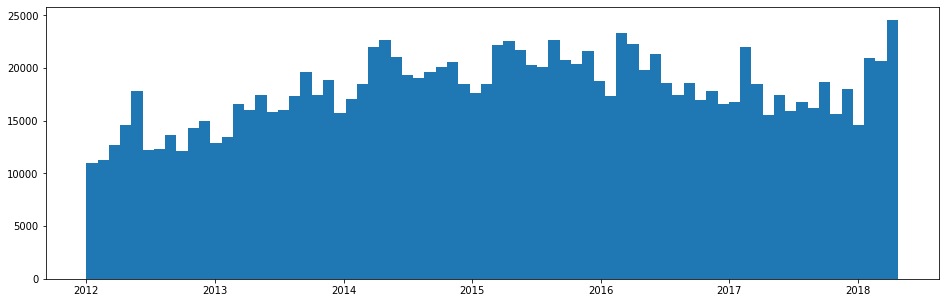

In [14]:
fig, ax= plt.subplots(figsize=(16,5))
plt.hist(df['Date Of Stop'],bins=72)
plt.show()

In [15]:
last=df['Date Of Stop'].max()
first=df['Date Of Stop'].min()
print(f'The first stop was on {first} and the last stop was on {last}')
print(f'Therefore our data spans {(last-first)} .')

The first stop was on 2012-01-01 00:00:00 and the last stop was on 2018-04-25 00:00:00
Therefore our data spans 2306 days 00:00:00 .


In [16]:
start_date='2012-01-01'
end_date='2013-01-01'
df2012=df[(df['Date Of Stop'] >= start_date) & (df['Date Of Stop'] < end_date)]
df['Date Of Stop'].dt.day

0          24
1          29
2           1
3          29
4          28
           ..
1292394    14
1292395    15
1292396    15
1292397    16
1292398    21
Name: Date Of Stop, Length: 1292399, dtype: int64

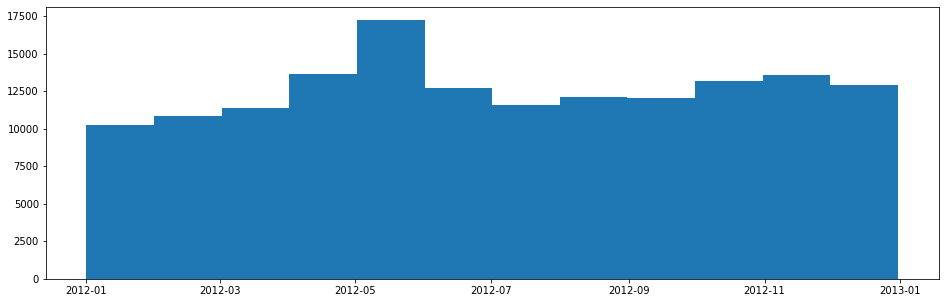

In [17]:
fig, ax= plt.subplots(figsize=(16,5))
plt.hist(df2012['Date Of Stop'],bins=12)
plt.show()

In [18]:
start_date='2013-01-01'
end_date='2014-01-01'
df2013=df[(df['Date Of Stop'] >= start_date) & (df['Date Of Stop'] < end_date)]

In [19]:
start_date='2014-01-01'
end_date='2015-01-01'
df2014=df[(df['Date Of Stop'] >= start_date) & (df['Date Of Stop'] < end_date)]

In [20]:
start_date='2015-01-01'
end_date='2016-01-01'
df2015=df[(df['Date Of Stop'] >= start_date) & (df['Date Of Stop'] < end_date)]

In [21]:
start_date='2016-01-01'
end_date='2017-01-01'
df2016=df[(df['Date Of Stop'] >= start_date) & (df['Date Of Stop'] < end_date)]

In [22]:
start_date='2017-01-01'
end_date='2018-01-01'
df2017=df[(df['Date Of Stop'] >= start_date) & (df['Date Of Stop'] < end_date)]

In [23]:
start_date='2018-01-01'
end_date='2019-01-01'
df2018=df[(df['Date Of Stop'] >= start_date) & (df['Date Of Stop'] < end_date)]

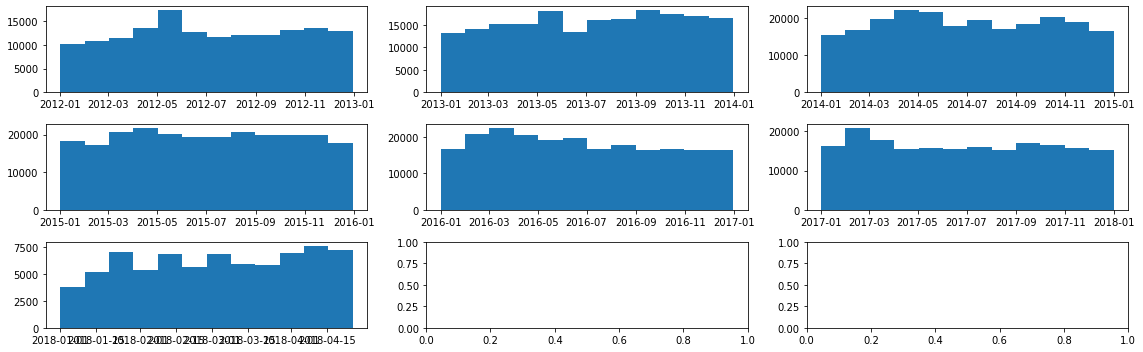

In [24]:
fig, ax= plt.subplots(3,3,figsize=(16,5))
ax[0,0].hist(df2012['Date Of Stop'],bins=12)
ax[0,1].hist(df2013['Date Of Stop'],bins=12)
ax[0,2].hist(df2014['Date Of Stop'],bins=12)
ax[1,0].hist(df2015['Date Of Stop'],bins=12)
ax[1,1].hist(df2016['Date Of Stop'],bins=12)
ax[1,2].hist(df2017['Date Of Stop'],bins=12)
ax[2,0].hist(df2018['Date Of Stop'],bins=12)
plt.tight_layout()
plt.show()

In [25]:
x=len(df['Date Of Stop'])/len(df['Date Of Stop'].unique())
print(f'Average number of tickets per day over the entire time span {round(x,2)}')

Average number of tickets per day over the entire time span 560.45


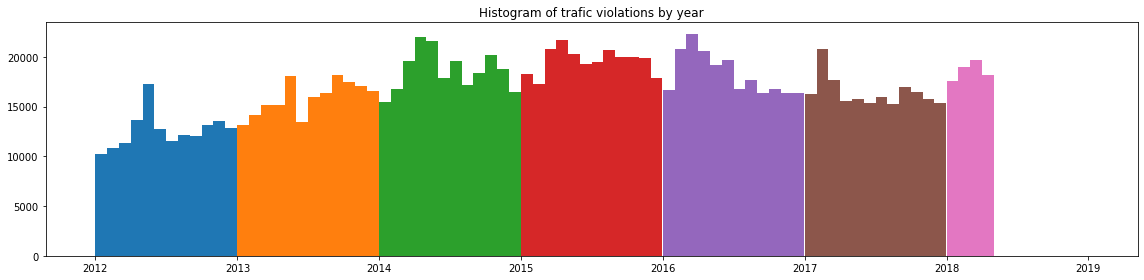

In [26]:
fig, ax= plt.subplots(figsize=(16,4))
ax.hist(df2012['Date Of Stop'],bins=12)
ax.hist(df2013['Date Of Stop'],bins=12)
ax.hist(df2014['Date Of Stop'],bins=12)
ax.hist(df2015['Date Of Stop'],bins=12)
ax.hist(df2016['Date Of Stop'],bins=12)
ax.hist(df2017['Date Of Stop'],bins=12)
ax.hist(df2018['Date Of Stop'],bins=12, range=(df2018['Date Of Stop'].min(), '12/31/18'))
plt.title('Histogram of trafic violations by year')
plt.tight_layout()
plt.show()

In [27]:
df2012['Date Of Stop'].dt.date

11         2012-03-19
12         2012-06-09
13         2012-12-20
14         2012-07-20
15         2012-09-11
              ...    
1292394    2012-12-14
1292395    2012-12-15
1292396    2012-12-15
1292397    2012-12-16
1292398    2012-12-21
Name: Date Of Stop, Length: 151376, dtype: object

In [28]:
## plot stops in january for each year
jancount=sum(df['Date Of Stop'].dt.month==1)
febcount=sum(df['Date Of Stop'].dt.month==2)
marcount=sum(df['Date Of Stop'].dt.month==3)
aprcount=sum(df['Date Of Stop'].dt.month==4)
maycount=sum(df['Date Of Stop'].dt.month==5)
juncount=sum(df['Date Of Stop'].dt.month==6)
julcount=sum(df['Date Of Stop'].dt.month==7)
augcount=sum(df['Date Of Stop'].dt.month==8)
sepcount=sum(df['Date Of Stop'].dt.month==9)
octcount=sum(df['Date Of Stop'].dt.month==10)
novcount=sum(df['Date Of Stop'].dt.month==11)
deccount=sum(df['Date Of Stop'].dt.month==12)
#fig, ax= plt.subplots(figsize=(16,5))
#plt.hist(df['Date Of Stop'].dt.month)
#plt.show()
monthdict={
'jancount':jancount/7,
'febcount':febcount/7,
'marcount':marcount/7,
'aprcount':aprcount/7,
'maycount':maycount/6,
'juncount':juncount/6,
'julcount':julcount/6,
'augcount':augcount/6,
'sepcount':sepcount/6,
'octcount':octcount/6,
'novcount':novcount/6,
'deccount':deccount/6}


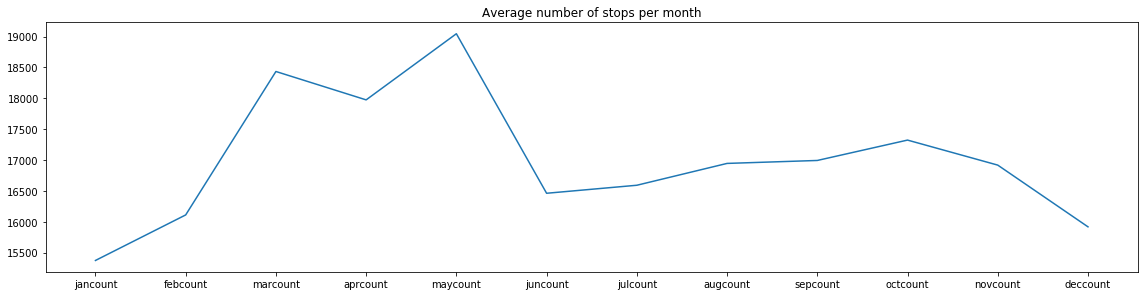

In [29]:
plt.subplots(figsize=(16,4))
plt.plot(list(monthdict.keys()), list(monthdict.values()))
plt.tight_layout()
plt.title('Average number of stops per month')
plt.show()

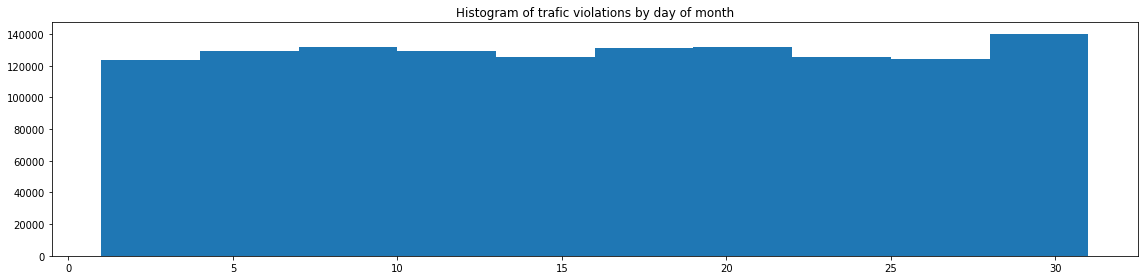

In [30]:
fig, ax= plt.subplots(figsize=(16,4))
ax.hist(df['Date Of Stop'].dt.day)
plt.title('Histogram of trafic violations by day of month')
plt.tight_layout()
plt.show()

In [31]:
datecounts2012={}
datecounts2013={}
datecounts2014={}
datecounts2015={}
datecounts2016={}
datecounts2017={}
datecounts2018={}
for i in df2012['Date Of Stop']:
    if i in datecounts2012:
        datecounts2012[i]+=1
    else:
        datecounts2012[i]=1
for i in df2013['Date Of Stop']:
    if i in datecounts2013:
        datecounts2013[i]+=1
    else:
        datecounts2013[i]=1
for i in df2014['Date Of Stop']:
    if i in datecounts2014:
        datecounts2014[i]+=1
    else:
        datecounts2014[i]=1
for i in df2015['Date Of Stop']:
    if i in datecounts2015:
        datecounts2015[i]+=1
    else:
        datecounts2015[i]=1  
for i in df2016['Date Of Stop']:
    if i in datecounts2016:
        datecounts2016[i]+=1
    else:
        datecounts2016[i]=1
for i in df2017['Date Of Stop']:
    if i in datecounts2017:
        datecounts2017[i]+=1
    else:
        datecounts2017[i]=1
for i in df2018['Date Of Stop']:
    if i in datecounts2018:
        datecounts2018[i]+=1
    else:
        datecounts2018[i]=1
datecounts2012=pd.DataFrame.from_dict(datecounts2012 , orient='index').sort_index()
datecounts2013=pd.DataFrame.from_dict(datecounts2013 , orient='index').sort_index()
datecounts2014=pd.DataFrame.from_dict(datecounts2014 , orient='index').sort_index()
datecounts2015=pd.DataFrame.from_dict(datecounts2015 , orient='index').sort_index()
datecounts2016=pd.DataFrame.from_dict(datecounts2016 , orient='index').sort_index()
datecounts2017=pd.DataFrame.from_dict(datecounts2017 , orient='index').sort_index()
datecounts2018=pd.DataFrame.from_dict(datecounts2018 , orient='index').sort_index()

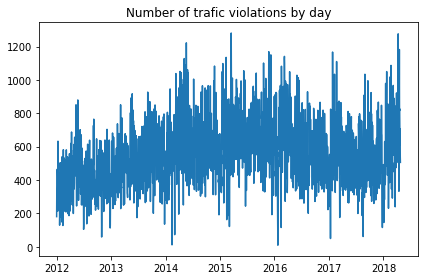

In [32]:
x=[x for x in range(1,367)]
y=[x for x in range(1,366)]
z=[x for x in range(1,len(datecounts2018)+1)]
#datecounts=pd.DataFrame(index=x)
#datecounts[2012]=datecounts2012
counts=[datecounts2012,datecounts2013,datecounts2014,datecounts2015,datecounts2016,datecounts2017,datecounts2018]
datecounts = pd.concat(counts)
plt.title('Number of trafic violations by day')
plt.plot(datecounts)
plt.tight_layout()
plt.show()


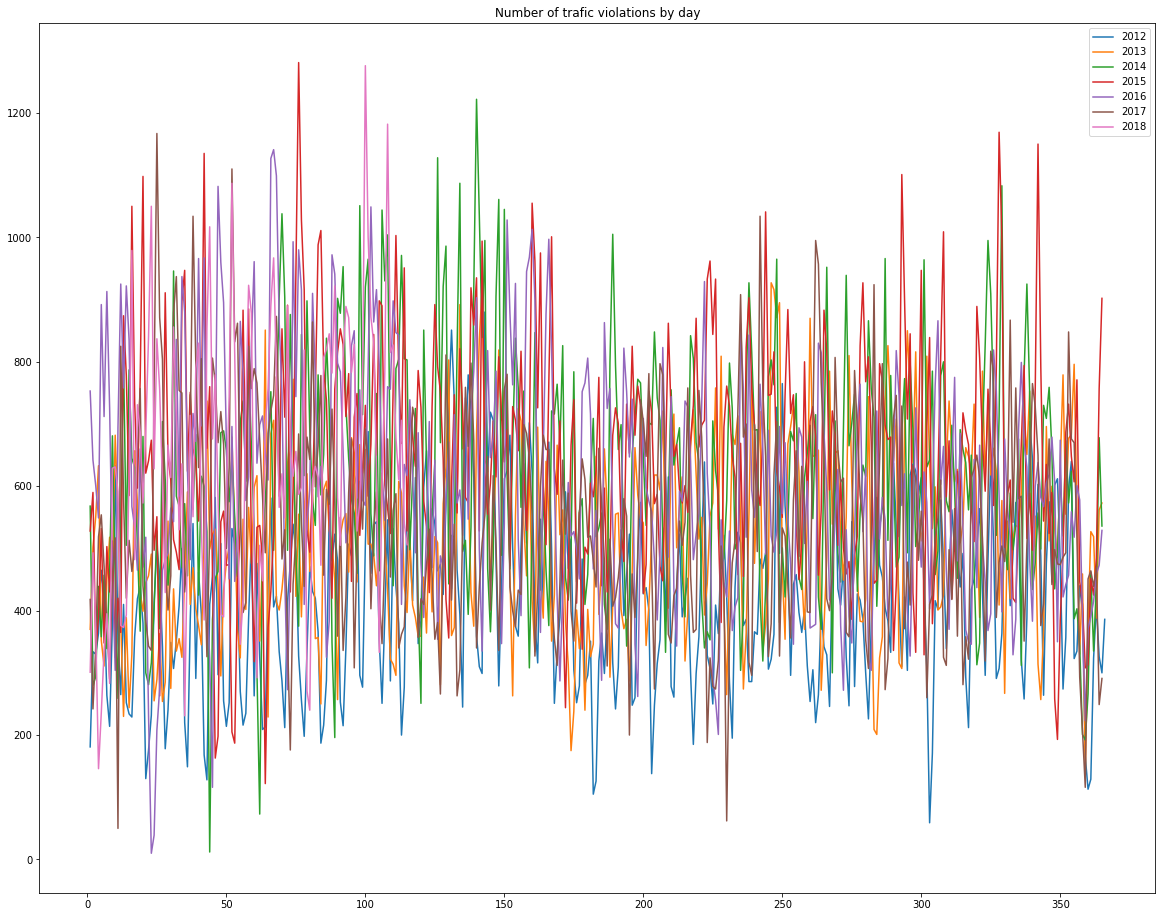

In [108]:
fig,ax= plt.subplots(figsize=(20,16))

ax.plot(x,datecounts2012, label='2012')
ax.plot(y,datecounts2013, label='2013')
ax.plot(y,datecounts2014, label='2014')
ax.plot(y,datecounts2015, label='2015')
ax.plot(y,datecounts2016, label='2016')
ax.plot(y,datecounts2017, label='2017')
ax.plot(z,datecounts2018, label='2018')

plt.legend()
plt.title('Number of trafic violations by day')
plt.show()

In [34]:
df.columns

Index(['Date Of Stop', 'Time Of Stop', 'Agency', 'SubAgency', 'Description',
       'Location', 'Latitude', 'Longitude', 'Accident', 'Belts',
       'Personal Injury', 'Property Damage', 'Fatal', 'Commercial License',
       'HAZMAT', 'Commercial Vehicle', 'Alcohol', 'Work Zone', 'State',
       'VehicleType', 'Year', 'Make', 'Model', 'Color', 'Violation Type',
       'Charge', 'Article', 'Contributed To Accident', 'Race', 'Gender',
       'Driver City', 'Driver State', 'DL State', 'Arrest Type', 'Geolocation',
       'datetime'],
      dtype='object')

In [35]:
df['SubAgency'].describe()

count                   1292389
unique                        7
top       4th district, Wheaton
freq                     322815
Name: SubAgency, dtype: object

(array([1.186627e+06, 5.401800e+04, 9.923000e+03, 1.700600e+04,
        1.341200e+04, 6.283000e+03, 2.878000e+03, 1.133000e+03,
        8.860000e+02, 2.330000e+02]),
 array([ 0. ,  1.8,  3.6,  5.4,  7.2,  9. , 10.8, 12.6, 14.4, 16.2, 18. ]),
 <a list of 10 Patch objects>)

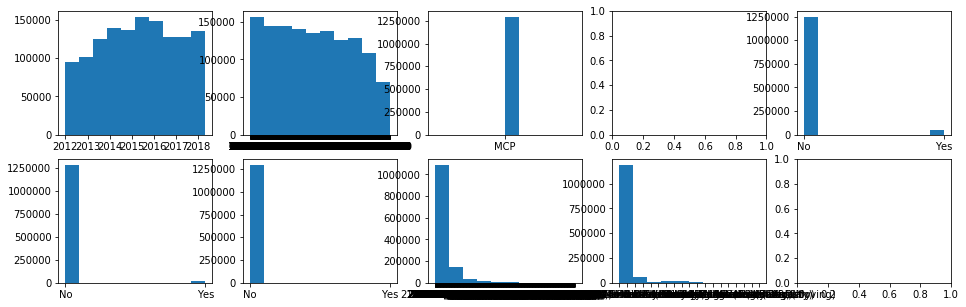

In [36]:
fig,ax=plt.subplots(2,5, figsize=(16,5))

ax[0,0].hist(df['Date Of Stop'])
ax[0,1].hist(df['Time Of Stop'])
ax[0,2].hist(df['Agency'])
#ax[0,3].hist(df['SubAgency'])
ax[0,4].hist(df['Belts'])
ax[1,0].hist(df['Personal Injury'])
ax[1,1].hist(df['Work Zone'])
ax[1,2].hist(df['Charge'])
ax[1,3].hist(df['Arrest Type'])


In [38]:
df['Color'].describe()

count     1276272
unique         26
top         BLACK
freq       259499
Name: Color, dtype: object

In [39]:
colorcounts={}
for i in df['Color']:
    if i in colorcounts:
        colorcounts[i]+=1
    else:
        colorcounts[i]=1
colorcounts=pd.DataFrame.from_dict(colorcounts , orient='index')
count=colorcounts[0]
color=list(colorcounts.index)

In [40]:
color=[str(x) for x in color]
print(len(colorcounts))
colorcounts

27


,0
BLACK,259499
GREEN,49520
SILVER,236828
WHITE,197558
GRAY,141092
RED,101733
GOLD,41177
BLUE,94814
NaN,16127
"BLUE, DARK",27111


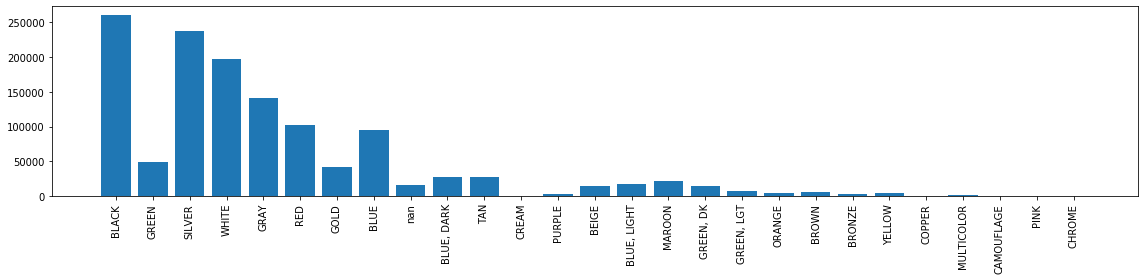

In [41]:
plt.subplots(figsize=(16,4))
plt.bar(color,colorcounts[0])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

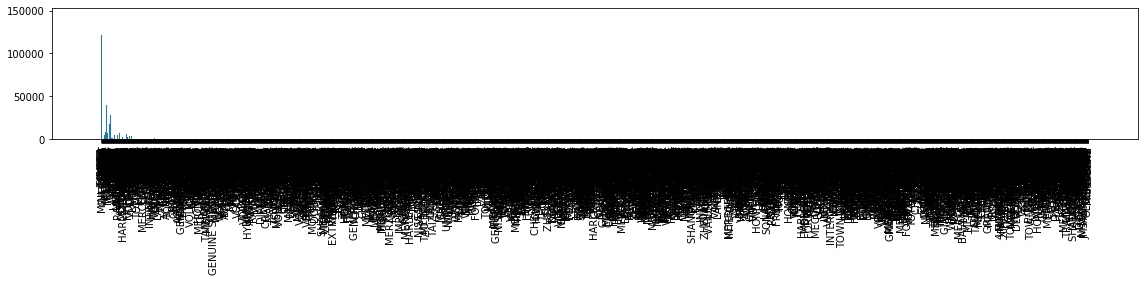

In [42]:
makecounts={}
for i in df['Make']:
    if i in makecounts:
        makecounts[i]+=1
    else:
        makecounts[i]=1
makecounts=pd.DataFrame.from_dict(makecounts , orient='index')
mcount=makecounts[0]
make=list(makecounts.index)
make=[str(x) for x in make]
plt.subplots(figsize=(16,4))
plt.bar(make,makecounts[0])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [45]:
print(len(makecounts))
makecounts.head(20)

3550


,0
FORD,121573
TOYOTA,145394
HONDA,138001
DODG,9488
MINI COOPER,137
HYUNDAI,24111
DODGE,34660
CADI,5977
CHEVROLET,27573
AUDI,12063


In [100]:
#the top 100 makes found in the data
makecounts.nlargest(100,0).sum()
#the percentage of total covered:
makecounts.nlargest(110,0).sum()/makecounts.nlargest(3550,0).sum()

0        0.975248
index         NaN
dtype: object

In [106]:
makecounts['COUNT']
makecounts.loc['COUNT'][0]=72854

KeyError: 'COUNT'

In [94]:
options(repr.matrix.max.rows=600, repr.matrix.max.cols=200)

SyntaxError: keyword can't be an expression (<ipython-input-94-827ae7ab17e2>, line 1)

In [59]:
for line in re.findall("HON.*", make):
    print(line)

TypeError: expected string or bytes-like object